Why do programmers not like nature? *Too many bugs and no documentation...*

# Pre-Processing
| Dependency | Description | Link |
|------------|-------------|------|
| Emgu.CV | Cross platform .NET wrapper to OpenCV | [![NuGet version](https://badge.fury.io/nu/Emgu.CV.svg)](https://badge.fury.io/nu/Emgu.CV) |
| Emgu.CV.runtime.windows | Contains native runtime of Emgu CV for Windows | [![NuGet version](https://badge.fury.io/nu/Emgu.CV.runtime.windows.svg)](https://badge.fury.io/nu/Emgu.CV.runtime.windows) |

In [1]:
// Import NuGet packages.
#r "nuget: Emgu.CV"
#r "nuget: Emgu.CV.runtime.windows"

// Import dependencies.
using System.Drawing;
using Emgu.CV;
using Emgu.CV.CvEnum;
using Emgu.CV.Structure;
using static System.Console;

// Extension method to display an image in a notebook cell by converting image to bytes
// in BGR format, then to JPEG data, and then base64-encoded string to display as HTML code.
static string ToHtml(this Mat image, int width, int height)
{
	var bytes = image.ToImage<Bgr, byte>().ToJpegData();
	var output = Convert.ToBase64String(bytes);
	return $"<img src='data:image/jpeg;base64,{output}' style='width:{width}px; height:{height}px;' /> ";
}

Installed Packages Emgu.CV, 4.9.0.5494 Emgu.CV.runtime.windows, 4.9.0.5494

# Face and Eye Detection Using Images
---
**Purpose:** Become familiarized with `OpenCV` and `Emgu.CV` capabilities in .NET.

**Description:** This code implements a VERY simple face detection software that uses [Haar Cascade algorithm](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html) to detect the frontal face and eyes. 

**Workflow:**
1. Instantiate a pre-trained Haar Cascade classifier.
2. Prepare image for classification.
3. Classify according to trained cascade.
4. Automatically dispose of all resources.

## Face Detection

Detecting faces in file: ../Data/Images/two-faces.jpg
Total faces detected: 2



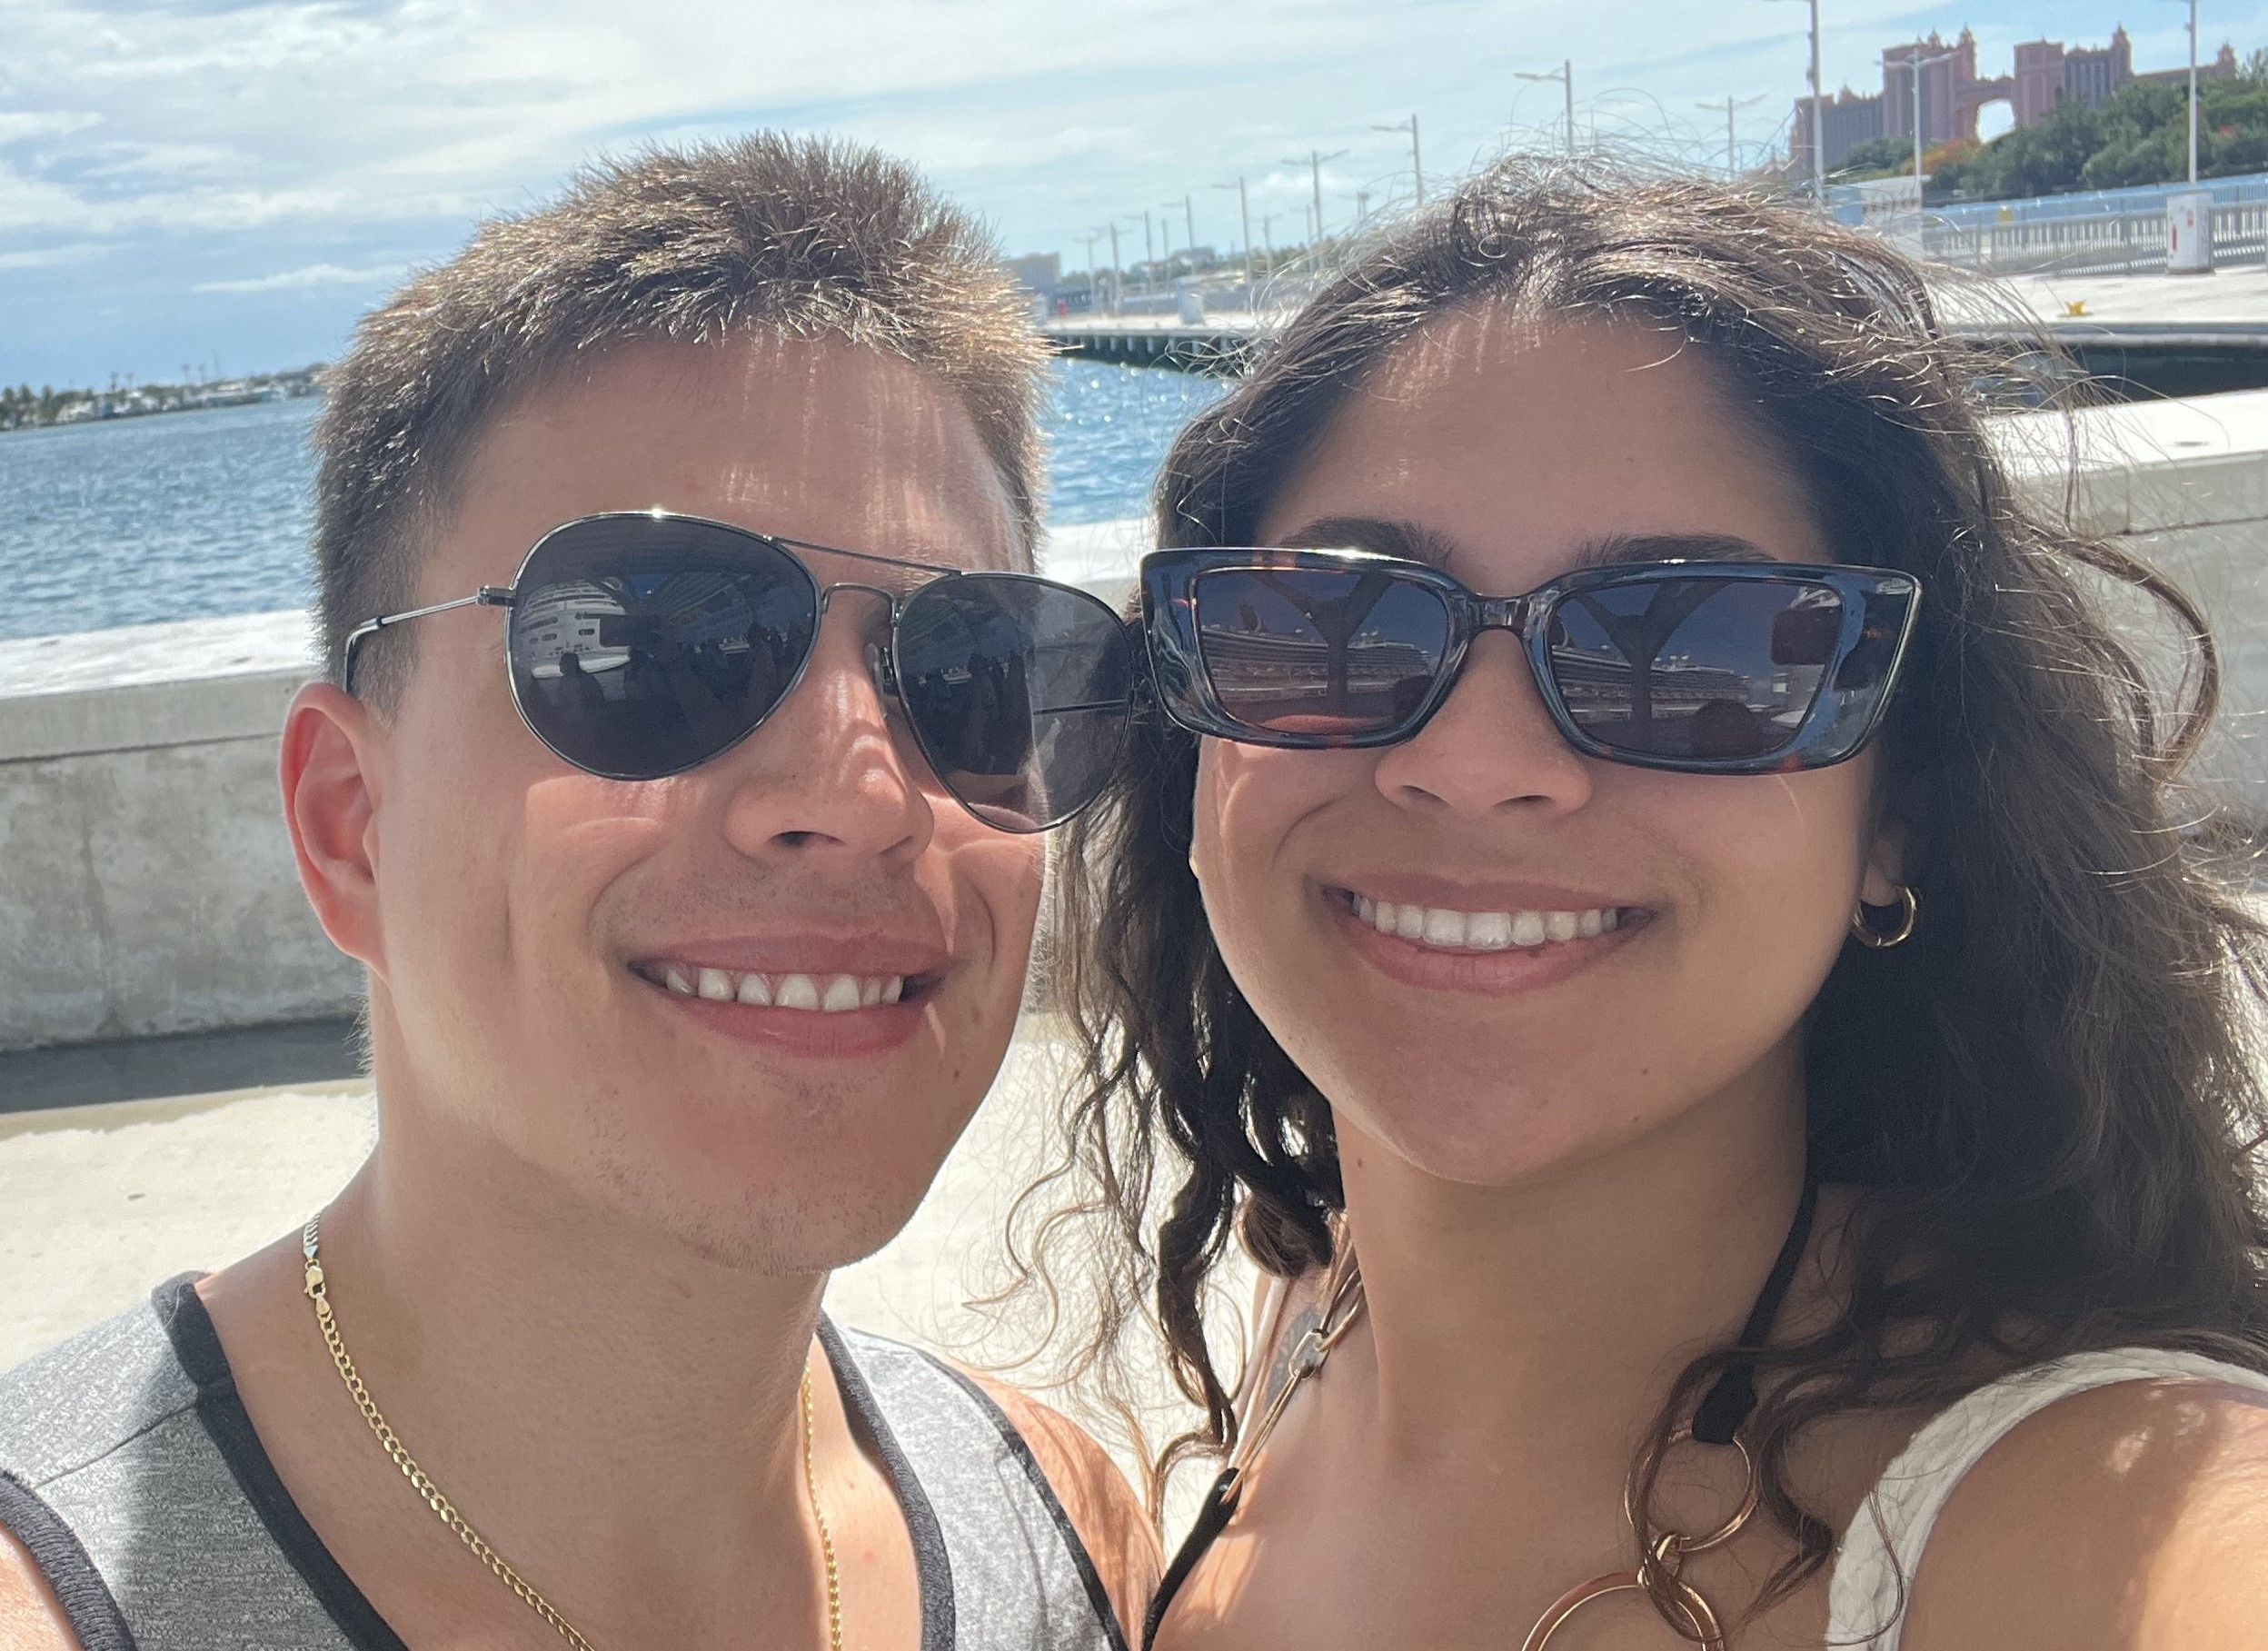
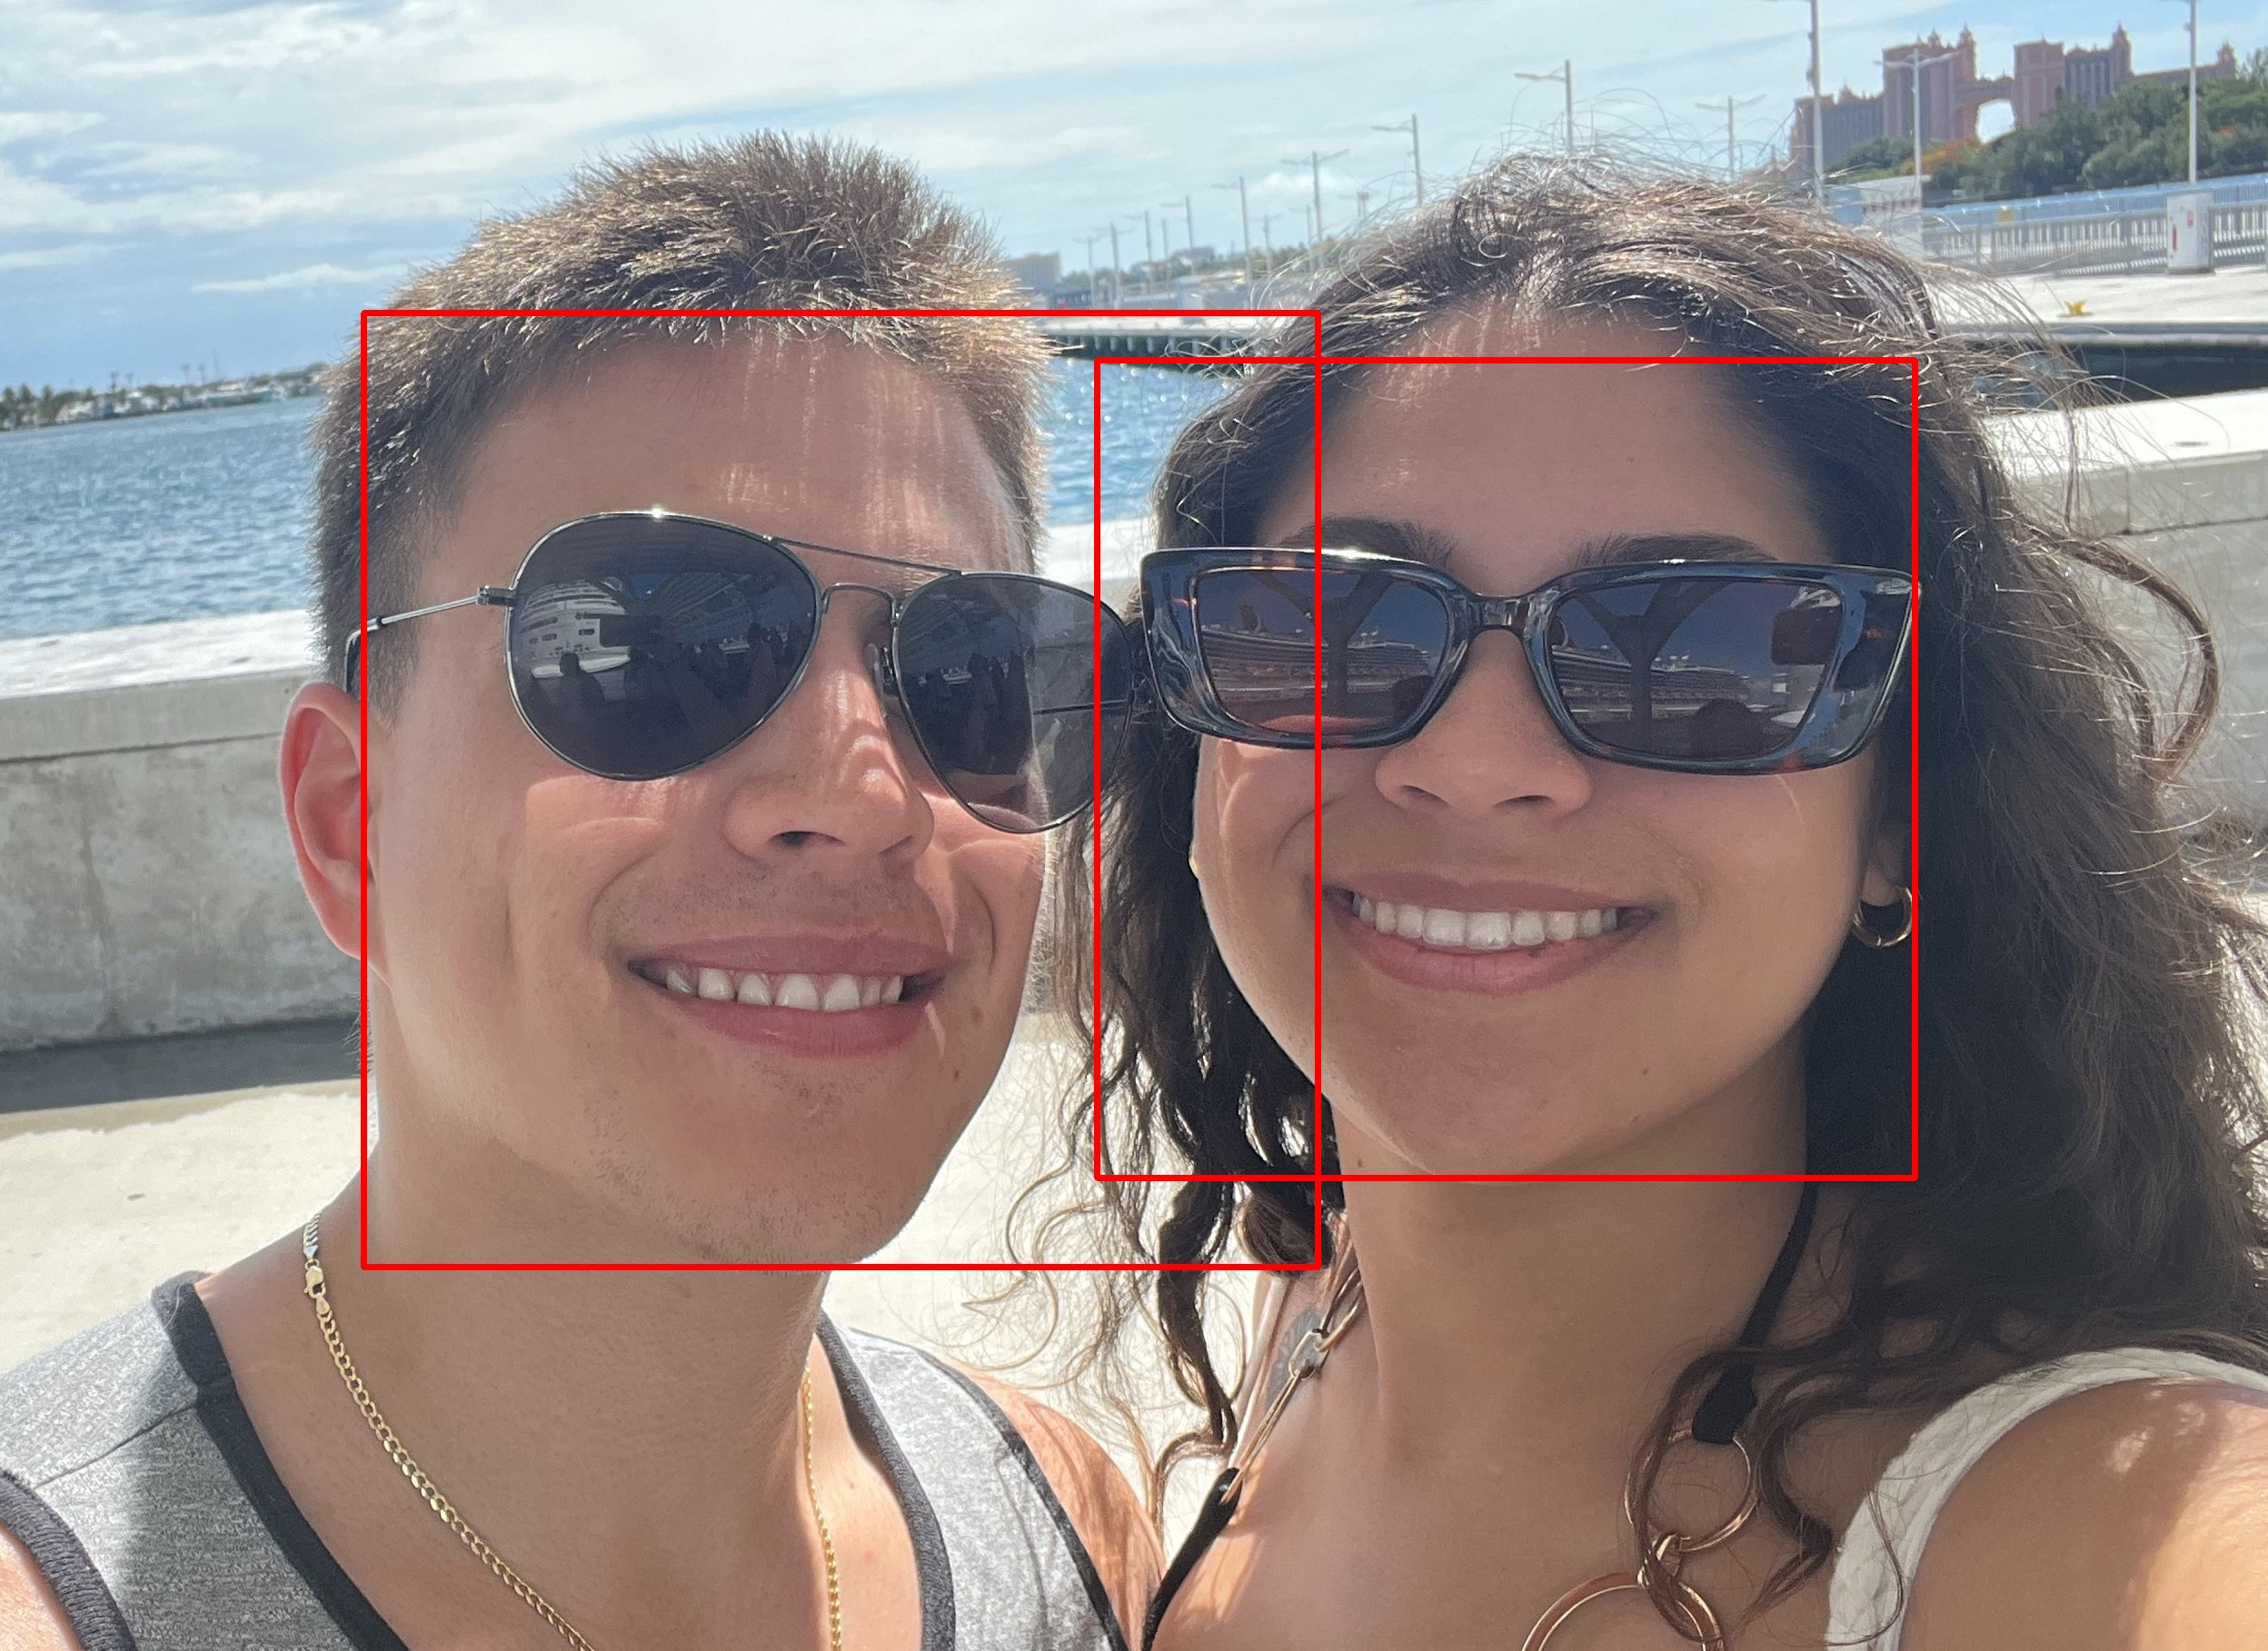

In [2]:
// Load Haar Cascade classifier for frontal face detection.
var imagePath = @"Images/two-faces.jpg";
var cascade = new CascadeClassifier(@"Data/HaarCascadeFrontalFace.xml");
WriteLine($"Detecting faces in file: {imagePath}");

// Disposable using statement to manage resources for the loaded image and grayscale image.
using (var headshot = new Mat(imagePath))
using (var grayImg = new Mat())
{
	// Save the initial state of the picture.
	var initial = headshot.ToHtml(485, 350);

	// Convert to grayscale and enhance contrast of the image to detect the faces.
	CvInvoke.CvtColor(headshot, grayImg, ColorConversion.Bgra2Gray);
	CvInvoke.EqualizeHist(grayImg, grayImg);
	var faces = cascade.DetectMultiScale(grayImg, minSize: new(60, 60));
	WriteLine($"Total faces detected: {faces.Count()}");

	// Place a red rectangle around the detected faces and display the image.
	var color = new MCvScalar(0, 0, 255);
	foreach (var faceRect in faces)	CvInvoke.Rectangle(headshot, faceRect, color, 5);
	
	// Place initial and final versions of the picture side-by-side and print to the console.
	var final = headshot.ToHtml(485, 350);
	var sideBySide = new StringBuilder().Append(initial).Append(final).ToString();
	var html = HTML(sideBySide);
	display(html);
}

## Eye Detection

Detecting faces in file: ../Data/Images/single-face.jpg
Total faces detected: 1
Total eyes detected: 4



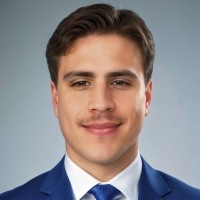
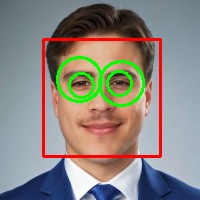

In [3]:
// Load Haar Cascade classifier for frontal face and eye detection.
var imagePath = @"Images/single-face.jpg";
var frontalCascade = new CascadeClassifier(@"Data/HaarCascadeFrontalFace.xml");
var eyeCascade = new CascadeClassifier(@"Data/HaarCascadeEyes.xml");
WriteLine($"Detecting faces in file: {imagePath}");

// Disposable using statement to manage resources for the loaded image and grayscale image.
using (var headshot = new Mat(imagePath))
using (var grayImg = new Mat())
{
	// Save the initial state of the picture.
	var initial = headshot.ToHtml(300, 325);

	// Convert to grayscale and enhance contrast of the image to detect the faces.
	CvInvoke.CvtColor(headshot, grayImg, ColorConversion.Bgra2Gray);
	CvInvoke.EqualizeHist(grayImg, grayImg);
	var faces = frontalCascade.DetectMultiScale(grayImg, minSize: new(60, 60));
	WriteLine($"Total faces detected: {faces.Count()}");

	// Place a red rectangle around the detected faces and green circles for eyes within it.
	var color = new MCvScalar(0, 0, 255);
	foreach (var faceRect in faces)
  {
  	using (var detectedFace = new Mat(headshot, faceRect))
    using (var detectedFaceGray = new Mat())
    {
      CvInvoke.Rectangle(headshot, faceRect, color, 2);

      // Do the same thing for the faces, but for the eyes in each face.
      CvInvoke.CvtColor(detectedFace, detectedFaceGray, ColorConversion.Bgra2Gray);
      var eyes = eyeCascade.DetectMultiScale(detectedFaceGray, minSize: new (10, 10));
	    WriteLine($"Total eyes detected: {eyes.Count()}");

      // Mark all the eyes in the faces and create a circle around its center point.
      var eyesCircColor = new MCvScalar(0, 255, 0);
      foreach (var eye in eyes)
      {
        var x = (int)(Math.Round(eye.X + eye.Width * 0.5, MidpointRounding.ToEven) + faceRect.Left);
        var y = (int)(Math.Round(eye.Y + eye.Height * 0.5, MidpointRounding.ToEven) + faceRect.Top);
        var center = new Point(x, y);

        var radius = (int)(Math.Round((eye.Width + eye.Height) * 0.25, MidpointRounding.ToEven));
        CvInvoke.Circle(headshot, center, radius, eyesCircColor, 2);
      }
    }
  }

	// Place initial and final versions of the picture side-by-side and print to the console.
	var final = headshot.ToHtml(300, 325);
	var sideBySide = new StringBuilder().Append(initial).Append(final).ToString();
	var html = HTML(sideBySide);
	display(html);
}